In [7]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv("Social_Network_Ads.csv")

In [11]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [13]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [17]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [21]:
df.isna()

,Age,EstimatedSalary,Purchased
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
395,False,False,False
396,False,False,False
397,False,False,False
398,False,False,False


In [23]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

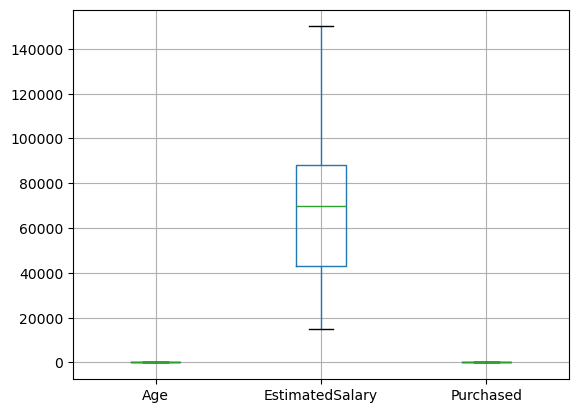

In [26]:
df.boxplot()

In [27]:
X = df.drop(['Purchased'], axis = 1)
Y = df['Purchased']

Use Logistic regression( Train the Machine ) to Create Model

In [29]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2,random_state = 0)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()

In [32]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
y_pred=logreg.predict(xtest)

In [34]:
print(xtrain)
print("------------\n")
print(xtest)
print("------------\n")
print(ytrain)
print("------------\n")
print(ytest)
print("------------\n")
print(y_pred)

     Age  EstimatedSalary
336   58           144000
64    59            83000
55    24            55000
106   26            35000
300   58            38000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[320 rows x 2 columns]
------------

     Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
14    18            82000
363   42            79000
304   40            60000
361   53            34000
329   47           107000

[80 rows x 2 columns]
------------

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64
------------

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64
----

In [35]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score,classification_report

In [37]:
cm= confusion_matrix(ytest, y_pred)
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [40]:
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9125


In [41]:
ps = precision_score(ytest, y_pred)
ps

0.8947368421052632

In [42]:
rs = recall_score(ytest, y_pred)
rs

0.7727272727272727

In [43]:
error_rate = 1- accuracy_score(ytest, y_pred)
error_rate

0.08750000000000002

In [45]:
print("classification report: ",classification_report(ytest, y_pred))

classification report:                precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



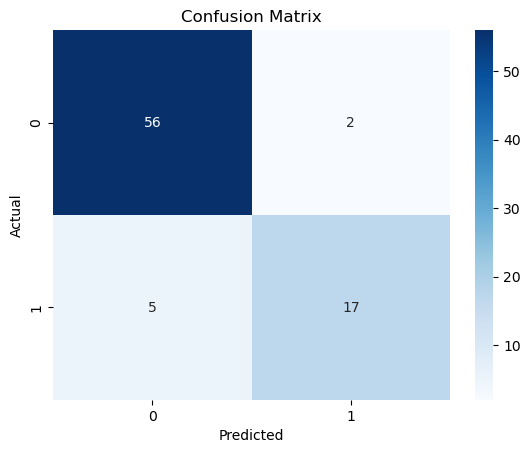

In [48]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()